# Basic wavelet tutorial
We will use the PyWavelets (pywt) library to construct and visualize wavelets. It contains the most important types of wavelets, like Haar, Daubechies, Symlets and Coiflets.

We start by importing the libraries pywt, numpy and matplotlib

In [1]:
%pip install PyWavelets # you can comment this if you already have this library installed

import pywt
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Definition of a family of wavelets
wavelet_name = 'db2' # Daubechies wavelets 

In [3]:
# Generation of the wavelet and scaling functions
wavelet = pywt.Wavelet(wavelet_name)
phi, psi, x = wavelet.wavefun(level=10) # level of resolution

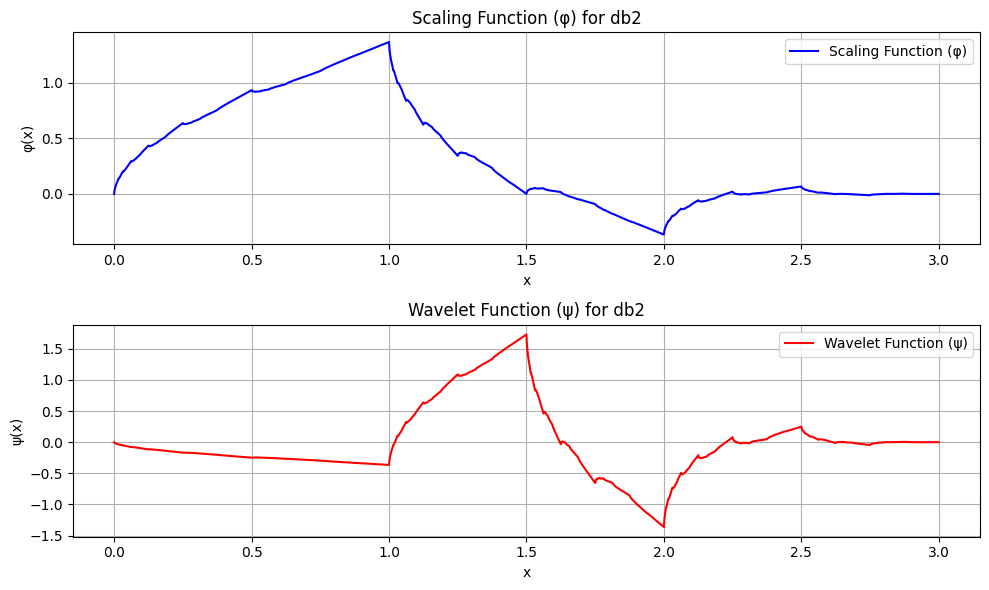

In [4]:
# plot the wavelet function (psi) and scaling function (phi)
plt.figure(figsize=(10, 6))

# Scaling function (phi)
plt.subplot(2, 1, 1)
plt.plot(x, phi, 'b', label='Scaling Function (φ)')
plt.title(f'Scaling Function (φ) for {wavelet_name}')
plt.xlabel('x')
plt.ylabel('φ(x)')
plt.grid()
plt.legend()


# Wavelet function (psi)
plt.subplot(2, 1, 2)
plt.plot(x, psi, 'r', label='Wavelet Function (ψ)')
plt.title(f'Wavelet Function (ψ) for {wavelet_name}')
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## Decomposition of a signal into Wavelets
We consider a signal given as a sine wave with noise and decompose it into a family of wavelets.

In [5]:
# Generation of the sample signal
t = np.linspace(0,1,1000) # time interval [0,1], step size 1/1000
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t)) # sine wave with noise

In [6]:
# perform wavelet decomposition
level = 4
coeffs = pywt.wavedec(signal, wavelet_name, level=level)

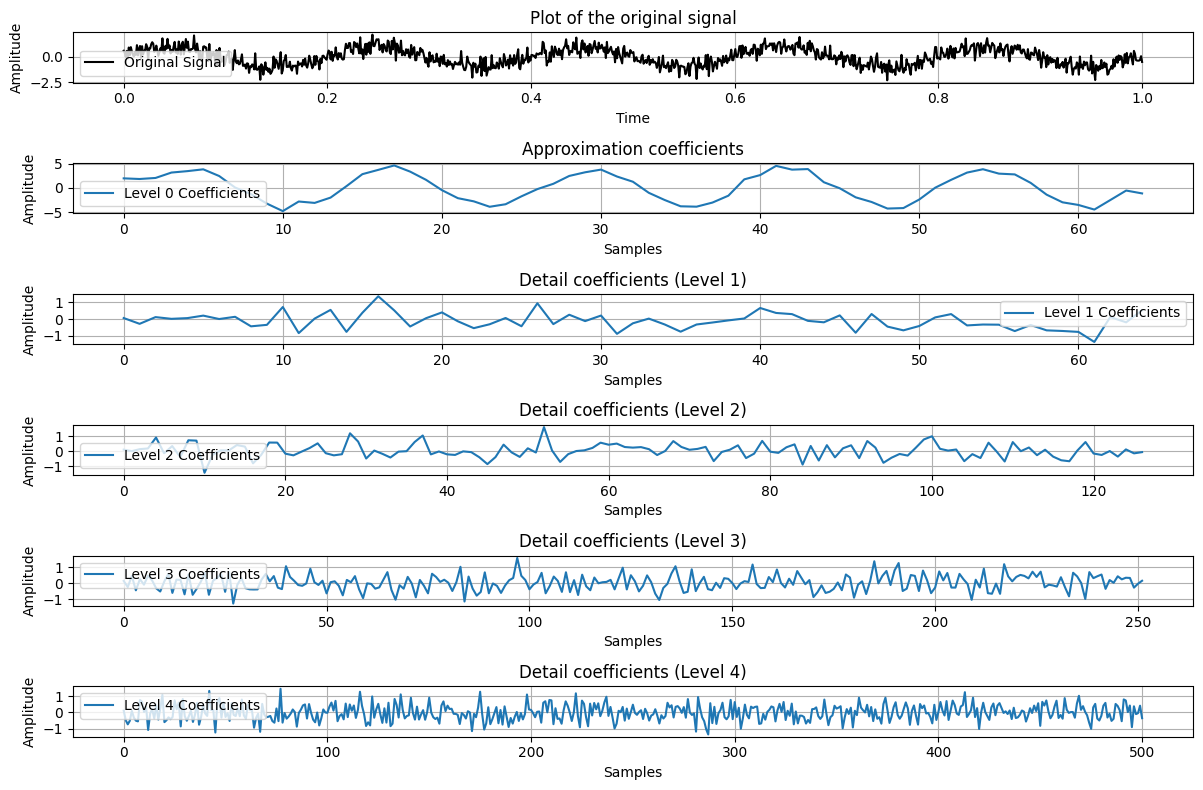

In [7]:
# Plot the original signal and the wavelet coefficient
plt.figure(figsize=(12,8))

# Original signal
plt.subplot(level + 2,1,1)
plt.plot(t, signal, 'k', label='Original Signal')
plt.title(f'Plot of the original signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Wavelet coefficient
for i, coeff in enumerate(coeffs):
    plt.subplot(level+2,1,i+2)
    plt.plot(coeff, label=f'Level {i} Coefficients')
    plt.title(f'Detail coefficients (Level {i})' if i>0 else 'Approximation coefficients')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()


plt.tight_layout()
plt.show()